In [1]:
import sys, os
sys.path.append(os.path.abspath('../../../../classifiers'))
sys.path.append(os.path.abspath('../../../../training'))
sys.path.append(os.path.abspath('../../../../validation'))
from validation_functions import execute_training_test_k_fold
from classifiers_ICQ import iqc_classifier

from sklearn.multiclass import OneVsRestClassifier
from sklearn.decomposition import PCA
from sklearn import datasets

import numpy as np
import matplotlib.pyplot as plt

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
range_step = 100
k_times_fold = 10

In [3]:
iris = datasets.load_iris()

y = iris.target
X = PCA(n_components=3).fit_transform(iris.data)[:, :]

In [4]:
dic_classifier_params = {}
dic_classifier_params["sigma_q_params"] = [1,1,1,1]
dic_classifier_params["use_polar_coordinates_on_sigma_q"] = False
dic_classifier_params["load_inputvector_env_state"] = True
dic_classifier_params["normalize_axis"] = 1

In [5]:
dic_training_params = {"max_iter": 1000,
    "accuracy_succ": 0.99,
    "plot_graphs_and_metrics": False,
    "plot_graphs_in_classifier": False,
    "random_seed": 1,
    "learning_rate": 0.01,
    "do_classes_refit":True,
    "reset_weights_epoch":0,
    "batch":1}

In [6]:
%run ../printing_methods.ipynb

In [7]:
negativities_per_class = []
entropies_per_class = []
for clazz in range(len(set(y))):
    negativities_per_class.append([])
    entropies_per_class.append([])

In [8]:
%%time
scores_list = []
f1scores_list = []

for max_iter in range(1, 1000, range_step):
    dic_training_params["max_iter"] = max_iter
    scores, f1scores, output_dict = execute_training_test_k_fold(
                    X, 
                    y, 
                    k_folds=k_times_fold,
                    random_seed=1, 
                    classifier_function=iqc_classifier, 
                    dic_classifier_params=dic_classifier_params,
                    one_vs_classifier=OneVsRestClassifier, 
                    dic_training_params=dic_training_params,
                    print_each_fold_metric=True,
                    print_avg_metric=True)
    scores_list.append(np.mean(scores))
    f1scores_list.append(np.mean(f1scores))

    for clazz in range(len(set(y))):
        negativities_per_class[clazz].append(np.mean(output_dict["negativities"][clazz]))
        entropies_per_class[clazz].append(np.mean(output_dict["entropies"][clazz]))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s finished


K-Fold #0
Mean negativities for all classes: [0.16350594330740478, 0.10293716687015812, 0.11092848565377021]
Mean entropies for all classes: [3.478567151696222e-15, 3.598152893731981e-15, 2.435782296300149e-15]
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         5
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         5

    accuracy                           0.33        15
   macro avg       0.11      0.33      0.17        15
weighted avg       0.11      0.33      0.17        15

-------------------------------------------------------------------------------------------------------------------


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=1)]: Using backend SequentialBackend w

K-Fold #1
Mean negativities for all classes: [0.11924174093133649, 0.1149825559650805, 0.1143177852387454]
Mean entropies for all classes: [2.1512133570397603e-15, 3.220899957433983e-15, 2.5611179561595384e-15]
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         5
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         5

    accuracy                           0.33        15
   macro avg       0.11      0.33      0.17        15
weighted avg       0.11      0.33      0.17        15

-------------------------------------------------------------------------------------------------------------------


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=1)]: Using backend SequentialBackend w

K-Fold #2
Mean negativities for all classes: [0.14762923900427374, 0.12886399623166506, 0.1291791976529326]
Mean entropies for all classes: [3.3053900739979134e-15, 3.0837965487870194e-15, 2.9440243301209786e-15]
              precision    recall  f1-score   support

           0       0.42      1.00      0.59         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.47      0.53      0.45        15
weighted avg       0.47      0.53      0.45        15

-------------------------------------------------------------------------------------------------------------------


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=1)]: Using backend SequentialBackend w

K-Fold #3
Mean negativities for all classes: [0.15088161680194195, 0.11100691767728323, 0.11149633913111266]
Mean entropies for all classes: [2.861988237411786e-15, 2.329974062981752e-15, 3.214228320332104e-15]
              precision    recall  f1-score   support

           0       0.36      1.00      0.53         5
           1       1.00      0.20      0.33         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.45      0.40      0.29        15
weighted avg       0.45      0.40      0.29        15

-------------------------------------------------------------------------------------------------------------------


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=1)]: Using backend SequentialBackend w

K-Fold #4
Mean negativities for all classes: [0.12061044207964171, 0.05380789529337447, 0.05658435230196477]
Mean entropies for all classes: [1.4332709457797576e-15, 1.77723536801618e-15, 2.5166946445518476e-15]
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         5
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         5

    accuracy                           0.33        15
   macro avg       0.11      0.33      0.17        15
weighted avg       0.11      0.33      0.17        15

-------------------------------------------------------------------------------------------------------------------


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=1)]: Using backend SequentialBackend w

K-Fold #5
Mean negativities for all classes: [0.11576710392394897, 0.08319527900942582, 0.08599750219325607]
Mean entropies for all classes: [1.5997291994159684e-15, 2.9241058305205437e-15, 2.26460605045661e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       0.50      0.20      0.29         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.29      0.40      0.28        15
weighted avg       0.29      0.40      0.28        15

-------------------------------------------------------------------------------------------------------------------


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=1)]: Using backend SequentialBackend w

K-Fold #6
Mean negativities for all classes: [0.15580322737753935, 0.13706471219114877, 0.13592385318656197]
Mean entropies for all classes: [3.1912905761062596e-15, 4.210197573843326e-15, 3.593204316463203e-15]
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         5
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         5

    accuracy                           0.33        15
   macro avg       0.11      0.33      0.17        15
weighted avg       0.11      0.33      0.17        15

-------------------------------------------------------------------------------------------------------------------


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=1)]: Using backend SequentialBackend w

K-Fold #7
Mean negativities for all classes: [0.12956615611122385, 0.1171637768295543, 0.11707321388663944]
Mean entropies for all classes: [1.9264099172693336e-15, 2.3025894547263113e-15, 1.964216432698558e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=1)]: Using backend SequentialBackend w

K-Fold #8
Mean negativities for all classes: [0.1543224449246089, 0.10200480099903751, 0.105497898679743]
Mean entropies for all classes: [2.629911957346902e-15, 3.939118443625178e-15, 2.750339016284009e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=1)]: Using backend SequentialBackend w

K-Fold #9
Mean negativities for all classes: [0.14889182188464584, 0.1314773796422867, 0.13382533590535367]
Mean entropies for all classes: [2.6876977559890615e-15, 2.1187070769882914e-15, 2.802149751503286e-15]
              precision    recall  f1-score   support

           0       0.36      1.00      0.53         5
           1       1.00      0.20      0.33         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.45      0.40      0.29        15
weighted avg       0.45      0.40      0.29        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.4000000000000001 F1-Scores = 0.2717590544989926 Negativity = [0.1257905319437777, 0.11618069404505414, 0.13522414429629048] Entropy = [3.170834113909451e-15, 2.6444104235444276e-15, 3.111070317635304e-15]


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=1)]: Using backend SequentialBackend w

K-Fold #0
Mean negativities for all classes: [0.21130064790130687, 0.16519499389835232, 0.20825028217016833]
Mean entropies for all classes: [3.462318784993093e-15, 3.282929588887675e-15, 3.641885982211614e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.60      0.75         5
           2       1.00      0.20      0.33         5

    accuracy                           0.60        15
   macro avg       0.82      0.60      0.57        15
weighted avg       0.82      0.60      0.57        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   20.0s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #1
Mean negativities for all classes: [0.12977094269005449, 0.0903219486570531, 0.1668002093499443]
Mean entropies for all classes: [2.6434362493937057e-15, 2.322108712890552e-15, 3.127726040100412e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   19.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #2
Mean negativities for all classes: [0.17449131923454228, 0.13659742663295127, 0.16701701049832482]
Mean entropies for all classes: [2.225187496997167e-15, 3.347359517136707e-15, 2.4361275307800245e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.48      0.47      0.40        15
weighted avg       0.48      0.47      0.40        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   20.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.1834140372066252, 0.18382635511322787, 0.2072387252862103]
Mean entropies for all classes: [4.362314875914819e-15, 2.1178692048922546e-15, 3.4573781125277404e-15]
              precision    recall  f1-score   support

           0       0.33      0.60      0.43         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.44      0.40      0.39        15
weighted avg       0.44      0.40      0.39        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   20.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #4
Mean negativities for all classes: [0.16555910126189444, 0.1374614386652107, 0.16042144169410302]
Mean entropies for all classes: [3.5225276496787274e-15, 2.0322998049507644e-15, 2.0425629641621253e-15]
              precision    recall  f1-score   support

           0       0.42      1.00      0.59         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.47      0.47      0.39        15
weighted avg       0.47      0.47      0.39        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   19.9s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #5
Mean negativities for all classes: [0.14210394058190184, 0.09301067955234522, 0.12932468349691895]
Mean entropies for all classes: [3.1146771987467573e-15, 3.0017143084771427e-15, 1.4831881871903538e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       0.50      0.20      0.29         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.29      0.40      0.28        15
weighted avg       0.29      0.40      0.28        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   20.0s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #6
Mean negativities for all classes: [0.1906163696256674, 0.12530367841376105, 0.2135450317653292]
Mean entropies for all classes: [2.65694945006502e-15, 2.6287575202721963e-15, 2.773980949644764e-15]
              precision    recall  f1-score   support

           0       0.36      1.00      0.53         5
           1       1.00      0.20      0.33         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.45      0.40      0.29        15
weighted avg       0.45      0.40      0.29        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   20.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.15600744775698003, 0.11604202059200666, 0.1383720249419452]
Mean entropies for all classes: [5.2508691176827134e-15, 2.4217046483363817e-15, 2.4288320411067128e-15]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         5
           1       1.00      0.60      0.75         5
           2       0.50      0.20      0.29         5

    accuracy                           0.60        15
   macro avg       0.67      0.60      0.57        15
weighted avg       0.67      0.60      0.57        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   19.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.19657349227862478, 0.1458475110952803, 0.19260735805152537]
Mean entropies for all classes: [3.222324621406173e-15, 3.737733395459686e-15, 4.3216095638037e-15]
              precision    recall  f1-score   support

           0       0.40      0.80      0.53         5
           1       1.00      0.60      0.75         5
           2       0.50      0.20      0.29         5

    accuracy                           0.53        15
   macro avg       0.63      0.53      0.52        15
weighted avg       0.63      0.53      0.52        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   19.9s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #9
Mean negativities for all classes: [0.16552056561953626, 0.11809298917734008, 0.20154010989643958]
Mean entropies for all classes: [2.4239418051488744e-15, 2.8204894647913387e-15, 2.280956270793964e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.48 F1-Scores = 0.4156437662784412 Negativity = [0.19491530798994253, 0.12896436689901727, 0.1593685854552728] Entropy = [3.462378118697461e-15, 2.6977570007948898e-15, 2.6695581816379662e-15]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   40.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.22535424905504417, 0.16519499389835232, 0.20825028217016833]
Mean entropies for all classes: [-4.07984375743986e-15, 3.282929588887675e-15, 3.641885982211614e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.60      0.75         5
           2       1.00      0.20      0.33         5

    accuracy                           0.60        15
   macro avg       0.82      0.60      0.57        15
weighted avg       0.82      0.60      0.57        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   40.3s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #1
Mean negativities for all classes: [0.12977094269005449, 0.0903219486570531, 0.1668002093499443]
Mean entropies for all classes: [2.6434362493937057e-15, 2.322108712890552e-15, 3.127726040100412e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   40.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #2
Mean negativities for all classes: [0.17449131923454228, 0.13659742663295127, 0.16701701049832482]
Mean entropies for all classes: [2.225187496997167e-15, 3.347359517136707e-15, 2.4361275307800245e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.48      0.47      0.40        15
weighted avg       0.48      0.47      0.40        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   40.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.1834140372066252, 0.18382635511322787, 0.2072387252862103]
Mean entropies for all classes: [4.362314875914819e-15, 2.1178692048922546e-15, 3.4573781125277404e-15]
              precision    recall  f1-score   support

           0       0.33      0.60      0.43         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.44      0.40      0.39        15
weighted avg       0.44      0.40      0.39        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   40.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #4
Mean negativities for all classes: [0.172056562233036, 0.1374614386652107, 0.16042144169410302]
Mean entropies for all classes: [4.350878620853208e-15, 2.0322998049507644e-15, 2.0425629641621253e-15]
              precision    recall  f1-score   support

           0       0.42      1.00      0.59         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.47      0.47      0.39        15
weighted avg       0.47      0.47      0.39        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   40.2s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #5
Mean negativities for all classes: [0.13442588893683685, 0.09301067955234522, 0.12932468349691895]
Mean entropies for all classes: [9.957772320971633e-15, 3.0017143084771427e-15, 1.4831881871903538e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       0.50      0.20      0.29         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.29      0.40      0.28        15
weighted avg       0.29      0.40      0.28        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   40.3s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #6
Mean negativities for all classes: [0.1906163696256674, 0.12530367841376105, 0.2135450317653292]
Mean entropies for all classes: [2.65694945006502e-15, 2.6287575202721963e-15, 2.773980949644764e-15]
              precision    recall  f1-score   support

           0       0.36      1.00      0.53         5
           1       1.00      0.20      0.33         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.45      0.40      0.29        15
weighted avg       0.45      0.40      0.29        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   40.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.15251299046116218, 0.11604202059200666, 0.1383720249419452]
Mean entropies for all classes: [7.312332025259915e-15, 2.4217046483363817e-15, 2.4288320411067128e-15]
              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       1.00      0.60      0.75         5
           2       0.50      1.00      0.67         5

    accuracy                           0.67        15
   macro avg       0.83      0.67      0.66        15
weighted avg       0.83      0.67      0.66        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   40.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.19657349227862478, 0.1458475110952803, 0.19260735805152537]
Mean entropies for all classes: [3.222324621406173e-15, 3.737733395459686e-15, 4.3216095638037e-15]
              precision    recall  f1-score   support

           0       0.40      0.80      0.53         5
           1       1.00      0.60      0.75         5
           2       0.50      0.20      0.29         5

    accuracy                           0.53        15
   macro avg       0.63      0.53      0.52        15
weighted avg       0.63      0.53      0.52        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   40.3s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #9
Mean negativities for all classes: [0.16552056561953626, 0.11809298917734008, 0.20154010989643958]
Mean entropies for all classes: [2.4239418051488744e-15, 2.8204894647913387e-15, 2.280956270793964e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.4866666666666667 F1-Scores = 0.42516757580225073 Negativity = [0.19959984170785494, 0.12896436689901727, 0.1593685854552728] Entropy = [9.483239378864762e-16, 2.6977570007948898e-15, 2.6695581816379662e-15]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.22582876390817871, 0.16519499389835232, 0.20825028217016833]
Mean entropies for all classes: [-1.5636320150385975e-14, 3.282929588887675e-15, 3.641885982211614e-15]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         5
           1       1.00      0.60      0.75         5
           2       0.50      0.20      0.29         5

    accuracy                           0.60        15
   macro avg       0.67      0.60      0.57        15
weighted avg       0.67      0.60      0.57        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.0min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #1
Mean negativities for all classes: [0.14059771994042872, 0.0903219486570531, 0.16690739989621595]
Mean entropies for all classes: [2.2327937517767063e-15, 2.322108712890552e-15, -7.0921120881166084e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #2
Mean negativities for all classes: [0.17933167079123408, 0.13659742663295127, 0.16701701049832482]
Mean entropies for all classes: [-6.729057824535168e-16, 3.347359517136707e-15, 2.4361275307800245e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.48      0.47      0.40        15
weighted avg       0.48      0.47      0.40        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.1834140372066252, 0.18382635511322787, 0.2068798762893052]
Mean entropies for all classes: [4.362314875914819e-15, 2.1178692048922546e-15, 1.4582769294122514e-15]
              precision    recall  f1-score   support

           0       0.33      0.60      0.43         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.44      0.40      0.39        15
weighted avg       0.44      0.40      0.39        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #4
Mean negativities for all classes: [0.16600263302296223, 0.1374614386652107, 0.02108232869495778]
Mean entropies for all classes: [-1.1596971701320266e-14, 2.0322998049507644e-15, 8.220854788824953e-15]
              precision    recall  f1-score   support

           0       0.42      1.00      0.59         5
           1       1.00      0.20      0.33         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.47      0.40      0.31        15
weighted avg       0.47      0.40      0.31        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.0min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #5
Mean negativities for all classes: [0.08885093126542985, 0.09301067955234522, 0.12932468349691895]
Mean entropies for all classes: [1.507503640337767e-14, 3.0017143084771427e-15, 1.4831881871903538e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       0.50      0.20      0.29         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.29      0.40      0.28        15
weighted avg       0.29      0.40      0.28        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #6
Mean negativities for all classes: [0.19244316455664928, 0.12530367841376105, 0.2135450317653292]
Mean entropies for all classes: [3.175054612799652e-14, 2.6287575202721963e-15, 2.773980949644764e-15]
              precision    recall  f1-score   support

           0       0.42      1.00      0.59         5
           1       1.00      0.20      0.33         5
           2       0.50      0.20      0.29         5

    accuracy                           0.47        15
   macro avg       0.64      0.47      0.40        15
weighted avg       0.64      0.47      0.40        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.14288830958678433, 0.11604202059200666, 0.1383720249419452]
Mean entropies for all classes: [-6.153593646021338e-15, 2.4217046483363817e-15, 2.4288320411067128e-15]
              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       1.00      0.60      0.75         5
           2       0.33      0.20      0.25         5

    accuracy                           0.60        15
   macro avg       0.63      0.60      0.57        15
weighted avg       0.63      0.60      0.57        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.185862769550571, 0.1458475110952803, 0.19260735805152537]
Mean entropies for all classes: [6.74268581764962e-15, 3.737733395459686e-15, 4.3216095638037e-15]
              precision    recall  f1-score   support

           0       0.40      0.80      0.53         5
           1       1.00      0.60      0.75         5
           2       0.50      0.20      0.29         5

    accuracy                           0.53        15
   macro avg       0.63      0.53      0.52        15
weighted avg       0.63      0.53      0.52        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #9
Mean negativities for all classes: [0.2055022242997037, 0.1397964818913769, 0.20154010989643958]
Mean entropies for all classes: [-4.4244226340619116e-15, 3.3064854807056265e-15, 2.280956270793964e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.20      0.33         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.46      0.40      0.30        15
weighted avg       0.46      0.40      0.30        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.47333333333333333 F1-Scores = 0.41155695611577964 Negativity = [0.19975801332556645, 0.13260902283123258, 0.16098203597417005] Entropy = [-2.9038348597622287e-15, -8.457365411497833e-16, 1.703527088487738e-15]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.2014866332135689, 0.16519499389835232, 0.20825028217016833]
Mean entropies for all classes: [-4.837674175189887e-14, 3.282929588887675e-15, 3.641885982211614e-15]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         5
           1       1.00      0.60      0.75         5
           2       0.50      0.20      0.29         5

    accuracy                           0.60        15
   macro avg       0.67      0.60      0.57        15
weighted avg       0.67      0.60      0.57        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.3min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #1
Mean negativities for all classes: [0.17380470489539743, 0.0903219486570531, 0.16690739989621595]
Mean entropies for all classes: [-1.7330562881893677e-15, 2.322108712890552e-15, -7.0921120881166084e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #2
Mean negativities for all classes: [0.17933167079123408, 0.13659742663295127, 0.16701701049832482]
Mean entropies for all classes: [-6.729057824535168e-16, 3.347359517136707e-15, 2.4361275307800245e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.48      0.47      0.40        15
weighted avg       0.48      0.47      0.40        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.18402710539997927, 0.18382635511322787, 0.2068798762893052]
Mean entropies for all classes: [-1.7957758990764584e-14, 2.1178692048922546e-15, 1.4582769294122514e-15]
              precision    recall  f1-score   support

           0       0.33      0.60      0.43         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.44      0.40      0.39        15
weighted avg       0.44      0.40      0.39        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.4min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #4
Mean negativities for all classes: [0.17247500116855066, 0.1374614386652107, 0.02108232869495778]
Mean entropies for all classes: [1.179181998395698e-14, 2.0322998049507644e-15, 8.220854788824953e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      0.20      0.33         5
           2       0.36      1.00      0.53         5

    accuracy                           0.40        15
   macro avg       0.45      0.40      0.29        15
weighted avg       0.45      0.40      0.29        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #5
Mean negativities for all classes: [0.14599260845636805, 0.10671765625361365, 0.12932468349691895]
Mean entropies for all classes: [4.2749226905774264e-14, 4.971309600112021e-15, 1.4831881871903538e-15]
              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       0.50      0.20      0.29         5
           2       0.50      0.40      0.44         5

    accuracy                           0.53        15
   macro avg       0.52      0.53      0.48        15
weighted avg       0.52      0.53      0.48        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.4min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #6
Mean negativities for all classes: [0.22179884570797578, 0.1505854275742684, 0.2135450317653292]
Mean entropies for all classes: [1.46723895511732e-15, -1.8782609361868622e-15, 2.773980949644764e-15]
              precision    recall  f1-score   support

           0       0.42      1.00      0.59         5
           1       0.67      0.40      0.50         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.36      0.47      0.36        15
weighted avg       0.36      0.47      0.36        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.14111577557551652, 0.11604202059200666, 0.1383720249419452]
Mean entropies for all classes: [-7.767925779810478e-15, 2.4217046483363817e-15, 2.4288320411067128e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.48      0.53      0.46        15
weighted avg       0.48      0.53      0.46        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.20372694401461863, 0.1458475110952803, 0.17628709315175675]
Mean entropies for all classes: [7.292384685618295e-15, 3.737733395459686e-15, 1.086313295377207e-14]
              precision    recall  f1-score   support

           0       0.40      0.80      0.53         5
           1       1.00      0.60      0.75         5
           2       0.50      0.20      0.29         5

    accuracy                           0.53        15
   macro avg       0.63      0.53      0.52        15
weighted avg       0.63      0.53      0.52        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.4min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #9
Mean negativities for all classes: [0.18059608010927433, 0.07177146316197792, 0.20154010989643958]
Mean entropies for all classes: [1.0218922616708497e-15, 3.763366301055236e-15, 2.280956270793964e-15]
              precision    recall  f1-score   support

           0       0.42      1.00      0.59         5
           1       0.67      0.40      0.50         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.36      0.47      0.36        15
weighted avg       0.36      0.47      0.36        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.4866666666666667 F1-Scores = 0.42096589512998184 Negativity = [0.1916439697606965, 0.14367801781622216, 0.16098203597417005] Entropy = [-1.3817308726933194e-14, -2.167686554471808e-15, 1.703527088487738e-15]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.20463129727895682, 0.16519499389835232, 0.20825028217016833]
Mean entropies for all classes: [-3.1177601725918724e-14, 3.282929588887675e-15, 3.641885982211614e-15]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         5
           1       1.00      0.60      0.75         5
           2       0.50      0.20      0.29         5

    accuracy                           0.60        15
   macro avg       0.67      0.60      0.57        15
weighted avg       0.67      0.60      0.57        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #1
Mean negativities for all classes: [0.14741225840580072, 0.0903219486570531, 0.16690739989621595]
Mean entropies for all classes: [-3.9828585691500786e-14, 2.322108712890552e-15, -7.0921120881166084e-15]
              precision    recall  f1-score   support

           0       0.50      0.80      0.62         5
           1       1.00      0.40      0.57         5
           2       0.40      0.40      0.40         5

    accuracy                           0.53        15
   macro avg       0.63      0.53      0.53        15
weighted avg       0.63      0.53      0.53        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #2
Mean negativities for all classes: [0.17961384983144016, 0.13659742663295127, 0.16637494670531267]
Mean entropies for all classes: [1.0692100275644068e-14, 3.347359517136707e-15, 8.204630960187421e-16]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.48      0.53      0.46        15
weighted avg       0.48      0.53      0.46        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.21130178633064703, 0.18382635511322787, 0.2068798762893052]
Mean entropies for all classes: [3.8036862186851877e-14, 2.1178692048922546e-15, 1.4582769294122514e-15]
              precision    recall  f1-score   support

           0       0.33      0.60      0.43         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.44      0.40      0.39        15
weighted avg       0.44      0.40      0.39        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #4
Mean negativities for all classes: [0.05713777621647946, 0.1374614386652107, 0.02108232869495778]
Mean entropies for all classes: [-1.9497994405269307e-14, 2.0322998049507644e-15, 8.220854788824953e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      0.20      0.33         5
           2       0.42      1.00      0.59         5

    accuracy                           0.40        15
   macro avg       0.47      0.40      0.31        15
weighted avg       0.47      0.40      0.31        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #5
Mean negativities for all classes: [0.14599260845636805, 0.10671765625361365, 0.12932468349691895]
Mean entropies for all classes: [4.2749226905774264e-14, 4.971309600112021e-15, 1.4831881871903538e-15]
              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       0.50      0.20      0.29         5
           2       0.50      0.40      0.44         5

    accuracy                           0.53        15
   macro avg       0.52      0.53      0.48        15
weighted avg       0.52      0.53      0.48        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.7min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #6
Mean negativities for all classes: [0.22606834075640905, 0.1505854275742684, 0.2135450317653292]
Mean entropies for all classes: [-5.586167162630091e-14, -1.8782609361868622e-15, 2.773980949644764e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       0.75      0.60      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.40      0.53      0.43        15
weighted avg       0.40      0.53      0.43        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.13054093502186678, 0.11604202059200666, 0.1383720249419452]
Mean entropies for all classes: [-2.1535941001528686e-15, 2.4217046483363817e-15, 2.4288320411067128e-15]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.50      0.53      0.47        15
weighted avg       0.50      0.53      0.47        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #8
Mean negativities for all classes: [0.20372694401461863, 0.1458475110952803, 0.17628709315175675]
Mean entropies for all classes: [7.292384685618295e-15, 3.737733395459686e-15, 1.086313295377207e-14]
              precision    recall  f1-score   support

           0       0.40      0.80      0.53         5
           1       1.00      0.60      0.75         5
           2       0.50      0.20      0.29         5

    accuracy                           0.53        15
   macro avg       0.63      0.53      0.52        15
weighted avg       0.63      0.53      0.52        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.7min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #9
Mean negativities for all classes: [0.18059608010927433, 0.07177146316197792, 0.20154010989643958]
Mean entropies for all classes: [1.0218922616708497e-15, 3.763366301055236e-15, 2.280956270793964e-15]
              precision    recall  f1-score   support

           0       0.42      1.00      0.59         5
           1       0.67      0.40      0.50         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.36      0.47      0.36        15
weighted avg       0.36      0.47      0.36        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.5066666666666666 F1-Scores = 0.452479829538653 Negativity = [0.19269219111582583, 0.13488053565302324, 0.16086207438990135] Entropy = [-8.084262051606479e-15, -1.4866196355575614e-14, 4.953307629599839e-15]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.20463129727895682, 0.16519499389835232, 0.20825028217016833]
Mean entropies for all classes: [-3.1177601725918724e-14, 3.282929588887675e-15, 3.641885982211614e-15]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         5
           1       1.00      0.60      0.75         5
           2       0.50      0.20      0.29         5

    accuracy                           0.60        15
   macro avg       0.67      0.60      0.57        15
weighted avg       0.67      0.60      0.57        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #1
Mean negativities for all classes: [0.18454511922839548, 0.0903219486570531, 0.16690739989621595]
Mean entropies for all classes: [-8.135460954610473e-15, 2.322108712890552e-15, -7.0921120881166084e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      0.40      0.57         5
           2       0.33      0.80      0.47         5

    accuracy                           0.40        15
   macro avg       0.44      0.40      0.35        15
weighted avg       0.44      0.40      0.35        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #2
Mean negativities for all classes: [0.17961384983144016, 0.1159860427037666, 0.16637494670531267]
Mean entropies for all classes: [1.0692100275644068e-14, 7.575685288964533e-15, 8.204630960187421e-16]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.48      0.53      0.46        15
weighted avg       0.48      0.53      0.46        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.21130178633064703, 0.18382635511322787, 0.2068798762893052]
Mean entropies for all classes: [3.8036862186851877e-14, 2.1178692048922546e-15, 1.4582769294122514e-15]
              precision    recall  f1-score   support

           0       0.33      0.60      0.43         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.44      0.40      0.39        15
weighted avg       0.44      0.40      0.39        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #4
Mean negativities for all classes: [0.05713777621647946, 0.1374614386652107, 0.01631313977995957]
Mean entropies for all classes: [-1.9497994405269307e-14, 2.0322998049507644e-15, 1.3357998540248551e-14]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      0.20      0.33         5
           2       0.42      1.00      0.59         5

    accuracy                           0.40        15
   macro avg       0.47      0.40      0.31        15
weighted avg       0.47      0.40      0.31        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #5
Mean negativities for all classes: [0.14599260845636805, 0.10671765625361365, 0.12932468349691895]
Mean entropies for all classes: [4.2749226905774264e-14, 4.971309600112021e-15, 1.4831881871903538e-15]
              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       0.50      0.20      0.29         5
           2       0.50      0.40      0.44         5

    accuracy                           0.53        15
   macro avg       0.52      0.53      0.48        15
weighted avg       0.52      0.53      0.48        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.0min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #6
Mean negativities for all classes: [0.22606834075640905, 0.1505854275742684, 0.2135450317653292]
Mean entropies for all classes: [-5.586167162630091e-14, -1.8782609361868622e-15, 2.773980949644764e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       0.75      0.60      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.40      0.53      0.43        15
weighted avg       0.40      0.53      0.43        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #7
Mean negativities for all classes: [0.13511372659341223, 0.11604202059200666, 0.1383720249419452]
Mean entropies for all classes: [4.644458648786331e-14, 2.4217046483363817e-15, 2.4288320411067128e-15]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.50      0.53      0.47        15
weighted avg       0.50      0.53      0.47        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.0min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #8
Mean negativities for all classes: [0.20390462426697592, 0.1458475110952803, 0.17628709315175675]
Mean entropies for all classes: [3.5501108658969577e-14, 3.737733395459686e-15, 1.086313295377207e-14]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      0.60      0.75         5
           2       0.42      1.00      0.59         5

    accuracy                           0.53        15
   macro avg       0.47      0.53      0.45        15
weighted avg       0.47      0.53      0.45        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.0min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #9
Mean negativities for all classes: [0.13571034568089596, 0.07177146316197792, 0.20154010989643958]
Mean entropies for all classes: [-4.607183985938701e-15, 3.763366301055236e-15, 2.280956270793964e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.49333333333333335 F1-Scores = 0.4279178338001867 Negativity = [0.19269219111582583, 0.1472581559272215, 0.15399161308017315] Entropy = [-8.084262051606479e-15, -4.301821443278843e-15, 6.362749553542448e-15]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.20463129727895682, 0.16519499389835232, 0.2082350009100954]
Mean entropies for all classes: [-3.1177601725918724e-14, 3.282929588887675e-15, 7.711673286613296e-16]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         5
           1       1.00      0.60      0.75         5
           2       0.50      0.20      0.29         5

    accuracy                           0.60        15
   macro avg       0.67      0.60      0.57        15
weighted avg       0.67      0.60      0.57        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #1
Mean negativities for all classes: [0.18454511922839548, 0.07795118971492446, 0.16690739989621595]
Mean entropies for all classes: [-8.135460954610473e-15, 1.6763440614093418e-15, -7.0921120881166084e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.80      0.80      0.80         5
           2       0.33      0.60      0.43         5

    accuracy                           0.47        15
   macro avg       0.38      0.47      0.41        15
weighted avg       0.38      0.47      0.41        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #2
Mean negativities for all classes: [0.1782658977588367, 0.1159860427037666, 0.16637494670531267]
Mean entropies for all classes: [-4.021338457582581e-15, 7.575685288964533e-15, 8.204630960187421e-16]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.48      0.53      0.46        15
weighted avg       0.48      0.53      0.46        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.21130178633064703, 0.18382635511322787, 0.2068798762893052]
Mean entropies for all classes: [3.8036862186851877e-14, 2.1178692048922546e-15, 1.4582769294122514e-15]
              precision    recall  f1-score   support

           0       0.33      0.60      0.43         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.44      0.40      0.39        15
weighted avg       0.44      0.40      0.39        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #4
Mean negativities for all classes: [0.05713777621647946, 0.1374614386652107, 0.01631313977995957]
Mean entropies for all classes: [-1.9497994405269307e-14, 2.0322998049507644e-15, 1.3357998540248551e-14]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      0.20      0.33         5
           2       0.42      1.00      0.59         5

    accuracy                           0.40        15
   macro avg       0.47      0.40      0.31        15
weighted avg       0.47      0.40      0.31        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #5
Mean negativities for all classes: [0.14599260845636805, 0.06489621251235339, 0.12932468349691895]
Mean entropies for all classes: [4.2749226905774264e-14, -2.979634229879639e-15, 1.4831881871903538e-15]
              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       0.60      0.60      0.60         5
           2       1.00      0.20      0.33         5

    accuracy                           0.60        15
   macro avg       0.72      0.60      0.55        15
weighted avg       0.72      0.60      0.55        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.4min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #6
Mean negativities for all classes: [0.22606834075640905, 0.14667982290417195, 0.2135450317653292]
Mean entropies for all classes: [-5.586167162630091e-14, 7.066948169750382e-15, 2.773980949644764e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       0.75      0.60      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.40      0.53      0.43        15
weighted avg       0.40      0.53      0.43        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.4min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #7
Mean negativities for all classes: [0.15901192505058567, 0.11604202059200666, 0.1383720249419452]
Mean entropies for all classes: [-4.8517669450342144e-14, 2.4217046483363817e-15, 2.4288320411067128e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      0.60      0.75         5
           2       0.42      1.00      0.59         5

    accuracy                           0.53        15
   macro avg       0.47      0.53      0.45        15
weighted avg       0.47      0.53      0.45        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.4min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #8
Mean negativities for all classes: [0.20390462426697592, 0.1458475110952803, 0.17628709315175675]
Mean entropies for all classes: [3.5501108658969577e-14, 3.737733395459686e-15, 1.086313295377207e-14]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      0.60      0.75         5
           2       0.42      1.00      0.59         5

    accuracy                           0.53        15
   macro avg       0.47      0.53      0.45        15
weighted avg       0.47      0.53      0.45        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.4min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #9
Mean negativities for all classes: [0.13571034568089596, 0.07177146316197792, 0.20154010989643958]
Mean entropies for all classes: [-4.607183985938701e-15, 3.763366301055236e-15, 2.280956270793964e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.5066666666666666 F1-Scores = 0.4382944288826642 Negativity = [0.19268709736246817, 0.14313456961317864, 0.15354229572263864] Entropy = [-9.041168269456572e-15, -4.517076327105913e-15, 1.4582699758002315e-15]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.20463129727895682, 0.16519499389835232, 0.2082350009100954]
Mean entropies for all classes: [-3.1177601725918724e-14, 3.282929588887675e-15, 7.711673286613296e-16]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         5
           1       1.00      0.60      0.75         5
           2       0.50      0.20      0.29         5

    accuracy                           0.60        15
   macro avg       0.67      0.60      0.57        15
weighted avg       0.67      0.60      0.57        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #1
Mean negativities for all classes: [0.18454511922839548, 0.07795118971492446, 0.16690739989621595]
Mean entropies for all classes: [-8.135460954610473e-15, 1.6763440614093418e-15, -7.0921120881166084e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.80      0.80      0.80         5
           2       0.33      0.60      0.43         5

    accuracy                           0.47        15
   macro avg       0.38      0.47      0.41        15
weighted avg       0.38      0.47      0.41        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #2
Mean negativities for all classes: [0.1782658977588367, 0.1159860427037666, 0.16637494670531267]
Mean entropies for all classes: [-4.021338457582581e-15, 7.575685288964533e-15, 8.204630960187421e-16]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.48      0.53      0.46        15
weighted avg       0.48      0.53      0.46        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.21130178633064703, 0.16826461180661764, 0.2068798762893052]
Mean entropies for all classes: [3.8036862186851877e-14, -9.171528477329976e-16, 1.4582769294122514e-15]
              precision    recall  f1-score   support

           0       0.33      0.60      0.43         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.44      0.40      0.39        15
weighted avg       0.44      0.40      0.39        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #4
Mean negativities for all classes: [0.05713777621647946, 0.1374614386652107, 0.01631313977995957]
Mean entropies for all classes: [-1.9497994405269307e-14, 2.0322998049507644e-15, 1.3357998540248551e-14]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      0.20      0.33         5
           2       0.42      1.00      0.59         5

    accuracy                           0.40        15
   macro avg       0.47      0.40      0.31        15
weighted avg       0.47      0.40      0.31        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #5
Mean negativities for all classes: [0.14599260845636805, 0.06489621251235339, 0.12932468349691895]
Mean entropies for all classes: [4.2749226905774264e-14, -2.979634229879639e-15, 1.4831881871903538e-15]
              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       0.60      0.60      0.60         5
           2       1.00      0.20      0.33         5

    accuracy                           0.60        15
   macro avg       0.72      0.60      0.55        15
weighted avg       0.72      0.60      0.55        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.7min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #6
Mean negativities for all classes: [0.22606834075640905, 0.14667982290417195, 0.2135450317653292]
Mean entropies for all classes: [-5.586167162630091e-14, 7.066948169750382e-15, 2.773980949644764e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       0.75      0.60      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.40      0.53      0.43        15
weighted avg       0.40      0.53      0.43        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.7min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #7
Mean negativities for all classes: [0.15901192505058567, 0.11604202059200666, 0.1383720249419452]
Mean entropies for all classes: [-4.8517669450342144e-14, 2.4217046483363817e-15, 2.4288320411067128e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      0.60      0.75         5
           2       0.42      1.00      0.59         5

    accuracy                           0.53        15
   macro avg       0.47      0.53      0.45        15
weighted avg       0.47      0.53      0.45        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.7min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #8
Mean negativities for all classes: [0.20390462426697592, 0.1458475110952803, 0.17628709315175675]
Mean entropies for all classes: [3.5501108658969577e-14, 3.737733395459686e-15, 1.086313295377207e-14]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      0.60      0.75         5
           2       0.42      1.00      0.59         5

    accuracy                           0.53        15
   macro avg       0.47      0.53      0.45        15
weighted avg       0.47      0.53      0.45        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.7min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #9
Mean negativities for all classes: [0.17478449737199148, 0.07177146316197792, 0.20154010989643958]
Mean entropies for all classes: [-5.034404355844669e-14, 3.763366301055236e-15, 2.280956270793964e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.5066666666666666 F1-Scores = 0.4382944288826642 Negativity = [0.19268709736246817, 0.14313456961317864, 0.15354229572263864] Entropy = [-9.041168269456572e-15, -4.517076327105913e-15, 1.4582699758002315e-15]


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #0
Mean negativities for all classes: [0.20463129727895682, 0.16519499389835232, 0.2082350009100954]
Mean entropies for all classes: [-3.1177601725918724e-14, 3.282929588887675e-15, 7.711673286613296e-16]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         5
           1       1.00      0.60      0.75         5
           2       0.50      0.20      0.29         5

    accuracy                           0.60        15
   macro avg       0.67      0.60      0.57        15
weighted avg       0.67      0.60      0.57        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #1
Mean negativities for all classes: [0.18454511922839548, 0.07795118971492446, 0.16690739989621595]
Mean entropies for all classes: [-8.135460954610473e-15, 1.6763440614093418e-15, -7.0921120881166084e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.80      0.80      0.80         5
           2       0.33      0.60      0.43         5

    accuracy                           0.47        15
   macro avg       0.38      0.47      0.41        15
weighted avg       0.38      0.47      0.41        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #2
Mean negativities for all classes: [0.1611715643421099, 0.1159860427037666, 0.16637494670531267]
Mean entropies for all classes: [7.727814663840675e-15, 7.575685288964533e-15, 8.204630960187421e-16]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.48      0.53      0.46        15
weighted avg       0.48      0.53      0.46        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.21130178633064703, 0.16826461180661764, 0.2068798762893052]
Mean entropies for all classes: [3.8036862186851877e-14, -9.171528477329976e-16, 1.4582769294122514e-15]
              precision    recall  f1-score   support

           0       0.33      0.60      0.43         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.44      0.40      0.39        15
weighted avg       0.44      0.40      0.39        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #4
Mean negativities for all classes: [0.05713777621647946, 0.1374614386652107, 0.01631313977995957]
Mean entropies for all classes: [-1.9497994405269307e-14, 2.0322998049507644e-15, 1.3357998540248551e-14]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      0.20      0.33         5
           2       0.42      1.00      0.59         5

    accuracy                           0.40        15
   macro avg       0.47      0.40      0.31        15
weighted avg       0.47      0.40      0.31        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


K-Fold #5
Mean negativities for all classes: [0.1026057380447428, 0.06489621251235339, 0.12932468349691895]
Mean entropies for all classes: [-5.748283575958772e-14, -2.979634229879639e-15, 1.4831881871903538e-15]
              precision    recall  f1-score   support

           0       0.56      1.00      0.71         5
           1       0.60      0.60      0.60         5
           2       1.00      0.20      0.33         5

    accuracy                           0.60        15
   macro avg       0.72      0.60      0.55        15
weighted avg       0.72      0.60      0.55        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.1min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #6
Mean negativities for all classes: [0.22606834075640905, 0.14667982290417195, 0.2135450317653292]
Mean entropies for all classes: [-5.586167162630091e-14, 7.066948169750382e-15, 2.773980949644764e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       0.75      0.60      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.40      0.53      0.43        15
weighted avg       0.40      0.53      0.43        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.1min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #7
Mean negativities for all classes: [0.15901192505058567, 0.11604202059200666, 0.1383720249419452]
Mean entropies for all classes: [-4.8517669450342144e-14, 2.4217046483363817e-15, 2.4288320411067128e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      0.60      0.75         5
           2       0.42      1.00      0.59         5

    accuracy                           0.53        15
   macro avg       0.47      0.53      0.45        15
weighted avg       0.47      0.53      0.45        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.1min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

K-Fold #8
Mean negativities for all classes: [0.20390462426697592, 0.17159439633257006, 0.17628709315175675]
Mean entropies for all classes: [3.5501108658969577e-14, 4.40425499408492e-15, 1.086313295377207e-14]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      0.60      0.75         5
           2       0.42      1.00      0.59         5

    accuracy                           0.53        15
   macro avg       0.47      0.53      0.45        15
weighted avg       0.47      0.53      0.45        15

-------------------------------------------------------------------------------------------------------------------
K-Fold #9
Mean negativities for all classes: [0.17478449737199148, 0.07177146316197792, 0.20154010989643958]
Mean entropies for all classes: [-5.034404355844669e-14, 3.763366301055236e-15, 2.280956270793964e-15]
              precision    recall  f1-score   support

           0       0.38  

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.1min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start

In [9]:
print_score(scores_list)

Maior Score atingido com 501 épocas: 0.5066666666666666

[0.4000000000000001, 0.48, 0.4866666666666667, 0.47333333333333333, 0.4866666666666667, 0.5066666666666666, 0.49333333333333335, 0.5066666666666666, 0.5066666666666666, 0.5066666666666666]




In [10]:
print_f1score(f1scores_list)

Maior F1Score atingido com 501 épocas: 0.452479829538653

[0.2717590544989926, 0.4156437662784412, 0.42516757580225073, 0.41155695611577964, 0.42096589512998184, 0.452479829538653, 0.4279178338001867, 0.4382944288826642, 0.4382944288826642, 0.4382944288826642]




Negativities ao longo do treinamento
Classe 0 [0.14062197363465653, 0.17153578641571338, 0.17247364173411298, 0.17107222241285672, 0.18043553693324835, 0.16870218764218609, 0.168401947463998, 0.17065697210245503, 0.1745643872715646, 0.16851626688872937]
Classe 1 [0.10825044807090145, 0.13116990417975288, 0.13116990417975288, 0.13334025345115655, 0.13043662416439422, 0.13043662416439422, 0.12837548577147576, 0.12256570503612722, 0.1210095307054662, 0.12358421922919519]
Classe 2 [0.11008239638300799, 0.1785116877150909, 0.1785116877150909, 0.164552610570113, 0.16292058408013615, 0.162856377700835, 0.16237945880933516, 0.16237793068332787, 0.16237793068332787, 0.16237793068332787]




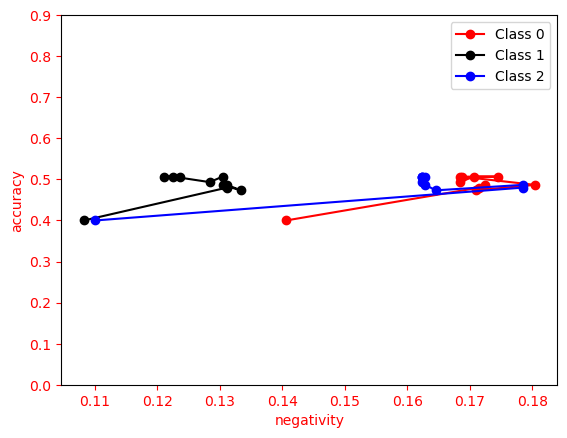

In [11]:
print_negativities(negativities_per_class, scores_list)

Entropies ao longo do treinamento
Classe 0 [2.5265469172052967e-15, 3.2884547250027058e-15, 3.5075293708570656e-15, 2.1679163062472327e-15, -1.2185825800979106e-15, -4.8726981233583245e-15, 5.414397181706498e-15, -5.553172285436713e-15, -1.0126858242687513e-14, -1.8975149197081386e-14]
Classe 1 [2.950477721065457e-15, 2.7712966166094692e-15, 2.7712966166094692e-15, 2.8198962182008984e-15, 2.611841983753441e-15, 2.611841983753441e-15, 3.034674560936224e-15, 3.0695246233826618e-15, 2.766022418120136e-15, 2.8326745779826597e-15]
Classe 2 [2.704636311487028e-15, 2.799424764232141e-15, 2.799424764232141e-15, 2.195360015565173e-15, 2.84951235456201e-15, 2.6879459110858818e-15, 3.2016602862282414e-15, 2.914588420873213e-15, 2.914588420873213e-15, 2.914588420873213e-15]




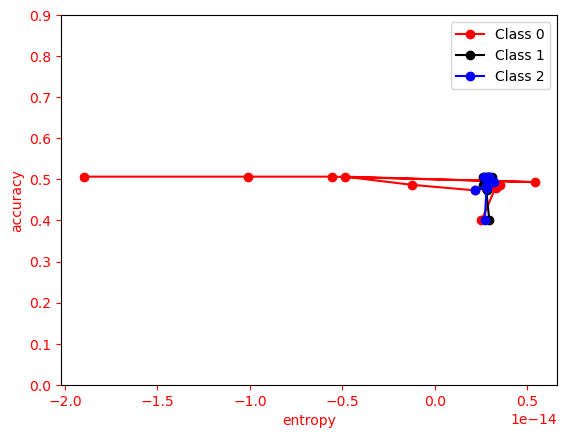

In [12]:
print_entropies(entropies_per_class, scores_list)